In [21]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [22]:

from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [23]:
from langgraph.graph.message import add_messages
#add messages is the reducer functions to add all the messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [24]:
llm = ChatOpenAI()


def chat_node(state : ChatState):
    #Take the user Query
    messages = state['messages']


    #Send the llm
    response = llm.invoke(messages)


    # Responde store State
    return {'messages':[response]}

In [25]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

#Add Nodes
graph.add_node('chat_node',chat_node)

#Add the Edge
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile(checkpointer = checkpointer)

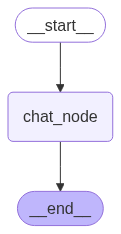

In [26]:
chatbot

In [27]:
initial_state = {
    'messages' : [HumanMessage(content = 'What is the Capitial of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

ValueError: Checkpointer requires one or more of the following 'configurable' keys: []

In [29]:
thread_id  = '1'

while True:
    user_query = input('TypeHere: ')

    if user_query.strip().lower() in ['exit','quit','bye']:
        break

    config = {'configurable':{'thread_id':thread_id}}

    response = chatbot.invoke({
    'messages' : [HumanMessage(content = user_query)]
        },config = config)

    print('AI:',response['messages'][-1].content)

AI: Hello RAM! It's nice to meet you. How can I assist you today?
AI: Sure, 125 + 10 equals 135.
AI: (10 * 12) + 3 equals 123.


In [30]:
chatbot.get_state(config = config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is RAM', additional_kwargs={}, response_metadata={}, id='edcfc240-3109-402b-901b-e662beefbfdc'), AIMessage(content="Hello RAM! It's nice to meet you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BxTjPZVg9JXxoXJNzJAMGDG8PN5tp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--7a40ae6e-a742-4378-95ca-9b05b8f00176-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reason